<h1><center>Fischer's Linear Discriminant</center></h1>
<hr style="border:2px solid black"> </hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data

In [2]:
# Read Training Images, Testing Images, Training Labels, Testing Labels
def read_data(class_name:str):
    train = np.array([plt.imread('Data/train/'+class_name+'/'+str(i)+'.jpg').reshape(-1) for i in range (0,5000)])/255
    test = np.array([plt.imread('Data/test/'+class_name+'/'+str(i)+'.jpg').reshape(-1) for i in range (0,1000)])/255
    return train,test

In [3]:
airplane_train,airplane_test = read_data('airplane')
automobile_train,automobile_test = read_data('automobile')
frog_train,frog_test = read_data('frog')
X_test=np.concatenate((airplane_test,automobile_test,frog_test))

<hr style="border:2px solid black"> </hr>

## Construct Fischer's Linear Discriminant classifier for each of the 3 classes.

In [4]:
def covariance(images,mean):
    result=np.zeros((mean.size,mean.size))
    for i in images:
        temp=i.reshape(-1,1)-mean
        result=result+np.dot( temp ,np.transpose(temp))
    return result
        
def make_fisher_classifier(class1,not_class1):
    class1_mean = class1.mean(axis=0).reshape(-1,1)
    not_class1_mean = not_class1.mean(axis=0).reshape(-1,1)
    
    sw = covariance(class1,class1_mean)+covariance(not_class1,not_class1_mean)
    sw_inverse=np.linalg.pinv(sw)
    
    w = np.dot(sw_inverse,(class1_mean-not_class1_mean))
    wnode= np.dot(np.transpose(w),(-0.5*(class1_mean+not_class1_mean)))
    return w,wnode

# Construct Confusion-Matrix for RGB results
def get_results(test):
    c_air=0
    c_car=0
    c_frog=0
    for i in test:
        c1=np.dot(np.transpose(ap_w),i)+ap_wnode[0][0]
        c1=c1[0]
        c2=np.dot(np.transpose(am_w),i)+am_wnode[0][0]
        c2=c2[0]
        c3=np.dot(np.transpose(fr_w),i)+fr_wnode[0][0]
        c3=c3[0]
        if(c1>c2 and c1>c3):
            c_air=c_air+1
        if(c2>c1 and c2>c3):
            c_car=c_car+1
        if(c3>c1 and c3>c2):
            c_frog=c_frog+1
    return [c_air,c_car,c_frog]

# Construct Confusion-Matrix for Gray-scale results
def get_gray_results(test):
    c_air=0
    c_car=0
    c_frog=0
    for i in test:
        c1=np.dot(np.transpose(ap_gray_w),i)+ap_gray_wnode[0][0]
        c1=c1[0]
        c2=np.dot(np.transpose(am_gray_w),i)+am_gray_wnode[0][0]
        c2=c2[0]
        c3=np.dot(np.transpose(fr_gray_w),i)+fr_gray_wnode[0][0]
        c3=c3[0]
        if(c1>c2 and c1>c3):
            c_air=c_air+1
        if(c2>c1 and c2>c3):
            c_car=c_car+1
        if(c3>c1 and c3>c2):
            c_frog=c_frog+1
    return [c_air,c_car,c_frog]

def convertGrayScale(image):
    newImage=[]
    for i in range(0,3070,3):
        ir=0.30*image[i]
        ig=0.59*image[i+1]
        ib=0.11*image[i+2]
        newImage.append(ir+ig+ib)
    return np.array(newImage)

In [5]:
# Airplane Classifier
ap_w,ap_wnode= make_fisher_classifier(airplane_train,np.concatenate((automobile_train,frog_train)))
am_w,am_wnode = make_fisher_classifier(automobile_train,np.concatenate((airplane_train,frog_train)))
print(ap_w,ap_wnode)

[[-8.71170724e-04]
 [ 8.27071114e-04]
 [ 7.27008849e-05]
 ...
 [-1.35779747e-04]
 [ 5.54266359e-04]
 [-5.19145918e-04]] [[-0.00026948]]


In [6]:
# Automobile Classifier
am_w,am_wnode = make_fisher_classifier(automobile_train,np.concatenate((airplane_train,frog_train)))
print(am_w,am_wnode)

[[ 0.00105534]
 [-0.00088908]
 [-0.00019206]
 ...
 [ 0.00023386]
 [-0.00049885]
 [ 0.00028923]] [[-3.70923946e-06]]


In [7]:
# Frog Classifier
fr_w, fr_wnode = make_fisher_classifier(frog_train,np.concatenate((airplane_train,automobile_train)))
print(fr_w,fr_wnode)

[[-2.88631331e-04]
 [ 1.35888204e-04]
 [ 1.51385089e-04]
 ...
 [-1.29918618e-04]
 [-2.76406163e-05]
 [ 2.43809866e-04]] [[8.51639067e-05]]


In [8]:
cm=[get_results(airplane_test),get_results(automobile_test),get_results(frog_test)]
confusion_matrix=np.array(cm)

## Confusion Matrix

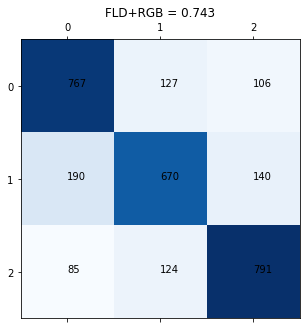

In [9]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+RGB = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

## Repeated for Grayscale

In [10]:
# Write code here
# Convert Data to grayscale
airplane_train_gray = np.array([convertGrayScale(i)for i in airplane_train])
airplane_test_gray =  np.array([convertGrayScale(i) for i in airplane_test])
automobile_train_gray =  np.array([convertGrayScale(i) for i in automobile_train])
automobile_test_gray =  np.array([convertGrayScale(i) for i in automobile_test])
frog_train_gray =  np.array([convertGrayScale(i) for i in frog_train])
frog_test_gray =  np.array([convertGrayScale(i) for i in frog_test])

# Train
# Airplane Gray Classifier
ap_gray_w,ap_gray_wnode= make_fisher_classifier(airplane_train_gray,np.concatenate((automobile_train_gray,frog_train_gray)))
# Automobile Gray Classifier
am_gray_w,am_gray_wnode = make_fisher_classifier(automobile_train_gray,np.concatenate((airplane_train_gray,frog_train_gray)))
# Frog Gray Classifier
fr_gray_w, fr_gray_wnode = make_fisher_classifier(frog_train_gray,np.concatenate((airplane_train_gray,automobile_train_gray)))

# Test
cm_gray=[get_gray_results(airplane_test_gray),get_gray_results(automobile_test_gray),get_gray_results(frog_test_gray)]
# confusion_matrix = 
print(ap_gray_w,ap_gray_wnode)
confusion_matrix=np.array(cm_gray)

[[ 4.23996863e-05]
 [-4.51059212e-06]
 [-2.01186072e-05]
 ...
 [-1.35712741e-04]
 [ 8.64789097e-05]
 [-5.59205801e-05]] [[-0.00024229]]


## Confusion Matrix (Don't Edit)

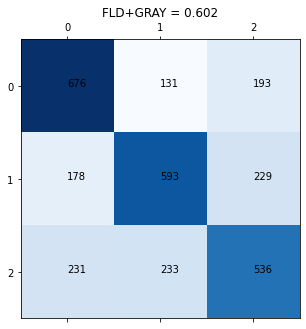

In [11]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+GRAY = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

<hr style="border:2px solid black"> </hr>

## Comment on the change of accuracy between RGB and Grayscale
##########

Using RBG images 74.3% of the images where correctly classified. However, using Gray scale Accuracy 60.2% of the images were correctly classified. Therfore, for this use case using RGB images is better. The class that showed most difference between the two is the frog class since the difference between RGB and gray scale correctly identified images is 255 images. which is a lot compared to 91 and 77 for airplane and automobile.
My interpretation for the results is that since image colors are lost during transforming to greyscale a lot of details that might identify many images apart from each other gets lost. Moreover, reducing the dimensionality of our data from 3072 dimensions in RGB to 1024 will lead to less information about the images and will be as if many points will be projected upon each other so the covariance between the different images wont be as big as the covariance for the RGB since it has much more dimensionality for the data to be spread through.

##########
<hr style="border:2px solid black"> </hr>